# **Limpieza de datos utilizando R**

### Recuerda que: Cada columna es una variable, y Cada fila es una observación.
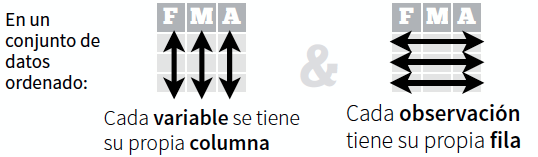
#### Empezamos instalando los paquetes necesarios:

In [32]:
install.packages("dplyr")
install.packages("tidyr")
install.packages("readxl")
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [33]:
library(dplyr)
library(tidyr)
library(readxl)
library(tidyverse)

# Unir bases de datos
Para unir bases de datos necesitamos una o más variables en común entre las dos bases de datos. Crearemos 2 desde la misma para el ejemplo.

In [34]:
morosidad16 <- read_xlsx("/content/morosidad16.xlsx")
morosidad17<- read_xlsx("/content/morosidad17.xlsx")

# **merge**: sirve para unir columnas de dos bases de datos diferentes
### merge(base1, base2, by.x="nombre variable base 1", by.y="nombre variable base 2")

En el caso en el que la variable se llame igual en las dos bases: merge(base1, base2, by="nombre variable")
Si queremos que se unan todos los casos, usamos la opción all=TRUE: merge(base1, base2, by="nombre variable", all=TRUE)

In [35]:
morosidad<-merge(morosidad17, morosidad16, by= "id", all=TRUE)

# Para explorar los datos, podemos convertirla base a una tibble para facilitar la lectura:
morosidad<-as_tibble(morosidad)
head(morosidad, 2)

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,nombre.y,deuda16,situacion.y,lugar.pago.y
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,VAN ADELBERGEN ISOLDA,133761,COBRO ADMINISTRATIVO,SUCURSAL DESAMPARADOS
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,BLAISE BLAISE CHRISTOPHE,42569,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ


# dim() Nos permite ver la dimensión de la base de dato:

In [36]:
dim(morosidad)

[1] 78703    10

# head() Nos permite ver las primeras filas de la base de datos.

In [37]:
head(morosidad, 3)

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,nombre.y,deuda16,situacion.y,lugar.pago.y
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,VAN ADELBERGEN ISOLDA,133761,COBRO ADMINISTRATIVO,SUCURSAL DESAMPARADOS
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,BLAISE BLAISE CHRISTOPHE,42569,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ
34382,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,7808,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,Inactivo,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,4000,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES


# tail() Nos permite ver las últimas filas. Tiene la misma sintaxis que head()

In [38]:
tail(morosidad, 3)

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,nombre.y,deuda16,situacion.y,lugar.pago.y
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
31010287878,SOLUCIONES MODERNAS Y DE SEGURIDAD SOMOS S.A.,255875,COBRO ADMINISTRATIVO,SUCURSAL SANTO DOMINGO,Activo,SOLUCIONES MODERNAS Y DE SEGURIDAD SOMOS S.A.,196630,COBRO ADMINISTRATIVO,SUCURSAL SANTO DOMINGO
31011413537,NA,NA,NA,NA,NA,LIMETZA S.A.,1665965,COBRO ADMINISTRATIVO,SUCURSAL DESAMPARADOS
31021120501,SUPER MERCADO EL KACIQUE LTDA,875409,COBRO ADMINISTRATIVO,SUCURSAL CARTAGO,Inactivo,NA,NA,NA,NA


# glimpse() nos permite explorar las variables. Nos dice, al lado de cada variable cuál es el tipo.

In [39]:
glimpse(morosidad)

Rows: 78,703
Columns: 10
$ id           <dbl> 0, 15452, 34382, 47329, 50075, 149005, 469611, 611086, 77…
$ nombre.x     <chr> "VAN ADELBERGEN ISOLDA", "BLAISE BLAISE CHRISTOPHE", "IND…
$ deuda17      <dbl> 265838, 83414, 7808, 620534, 506818, 8240, 526936, 103397…
$ situacion.x  <chr> "DIFICIL COBRO", "COBRO ADMINISTRATIVO", "COBRO ADMINISTR…
$ lugar.pago.x <chr> "SUCURSAL DESAMPARADOS", "SUCURSAL SANTA CRUZ", "SUCURSAL…
$ Estado       <chr> "Inactivo", "Inactivo", "Inactivo", "Inactivo", "Activo",…
$ nombre.y     <chr> "VAN  ADELBERGEN ISOLDA", "BLAISE BLAISE CHRISTOPHE", "IN…
$ deuda16      <dbl> 133761, 42569, 4000, 313886, NA, NA, 264303, 52546, NA, 7…
$ situacion.y  <chr> "COBRO ADMINISTRATIVO", "COBRO ADMINISTRATIVO", "COBRO AD…
$ lugar.pago.y <chr> "SUCURSAL DESAMPARADOS", "SUCURSAL SANTA CRUZ", "SUCURSAL…


# dplyr

Uno de los paquetes que más funciona para manipular datos de forma fácil es dplyr.
Este paquete tiene, entre otras, cinco funciones para manipular datos: select() filter() arrange() mutate() summarize().

# select(), permite seleccionar columnas. La sintaxis sería: select(dataframe, col1, col2)
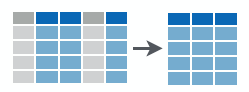

In [40]:
morosidad <- head(morosidad, 6)
select(morosidad, id, deuda17, deuda16)

id,deuda17,deuda16
<dbl>,<dbl>,<dbl>
0,265838,133761
15452,83414,42569
34382,7808,4000
47329,620534,313886
50075,506818,NA
149005,8240,NA


### También podemos seleccionar todas las columnas menos algunas poniendo - antes del nombre de la columna que no queremos seleccionar.

In [41]:
select(morosidad, -Estado)

id,nombre.x,deuda17,situacion.x,lugar.pago.x,nombre.y,deuda16,situacion.y,lugar.pago.y
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,VAN ADELBERGEN ISOLDA,133761,COBRO ADMINISTRATIVO,SUCURSAL DESAMPARADOS
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,BLAISE BLAISE CHRISTOPHE,42569,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ
34382,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,7808,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,4000,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES
47329,VANNUCCI VANNUCCI ALBERTO,620534,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,VANNUCCI VANNUCCI ALBERTO,313886,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ
50075,MARIA SELENIA CAYETANA CARVAJAL VENEGAS,506818,COBRO ADMINISTRATIVO,SUCURSAL LIBERIA,NA,NA,NA,NA
149005,ROSARIO CONEJO FÑCRUZ MARY GUASCH C,8240,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,NA,NA,NA,NA


## Si queremos seleccionar un rango de columnas, por ejemplo de id a situacion, usamos:

In [42]:
select(morosidad, id:situacion.x)

id,nombre.x,deuda17,situacion.x
<dbl>,<chr>,<dbl>,<chr>
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO
34382,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,7808,COBRO ADMINISTRATIVO
47329,VANNUCCI VANNUCCI ALBERTO,620534,COBRO ADMINISTRATIVO
50075,MARIA SELENIA CAYETANA CARVAJAL VENEGAS,506818,COBRO ADMINISTRATIVO
149005,ROSARIO CONEJO FÑCRUZ MARY GUASCH C,8240,COBRO ADMINISTRATIVO


# Si queremos guardar el resultado de esa función en un nuevo objeto, debemos asignarlo con <-
### Por ejemplo, si nos interesa quedarnos únicamente con columnas que no estén repetidas:

# filter() nos permite filtrar filas.
### La sintaxis es simple: filter(base, condicion). Donde condición es la condión lógica por la que queremos filtrar datos.
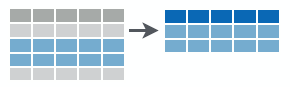
# Para ello usamos operadores lógicos:

#### **>:** mayor que
#### **<:** menor que
#### **>=:** mayor o igual que
#### **<=:** menor o igual que
#### **==:** igual que (se ponen dos signos de igual)
#### **!=:** diferente
#### **&:** y
#### **|:** o
#### **is.na(variable):** filtra los valores en blanco de la variable seleccionada.
#### **!is.na(variable):** filtra los valores que no están en blanco de la variable.names

In [43]:
morosidad1 <- select(morosidad, -nombre.y, -situacion.y, -lugar.pago.y)
morosidad1

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,deuda16
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,133761
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,42569
34382,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,7808,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,Inactivo,4000
47329,VANNUCCI VANNUCCI ALBERTO,620534,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,313886
50075,MARIA SELENIA CAYETANA CARVAJAL VENEGAS,506818,COBRO ADMINISTRATIVO,SUCURSAL LIBERIA,Activo,NA
149005,ROSARIO CONEJO FÑCRUZ MARY GUASCH C,8240,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,Inactivo,NA


In [44]:
filter(morosidad1, deuda17>100000)

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,deuda16
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,133761
47329,VANNUCCI VANNUCCI ALBERTO,620534,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,313886
50075,MARIA SELENIA CAYETANA CARVAJAL VENEGAS,506818,COBRO ADMINISTRATIVO,SUCURSAL LIBERIA,Activo,NA


### O las deudas que crecieron entre 2016 y 2017:

In [45]:
filter(morosidad1, deuda17>deuda16)

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,deuda16
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,133761
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,42569
34382,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,7808,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,Inactivo,4000
47329,VANNUCCI VANNUCCI ALBERTO,620534,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,313886


### O solamente las deudas mayores a un millón y de díficil cobro:

In [46]:
filter(morosidad1, deuda17>100000 & situacion.x=="DIFICIL COBRO")

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,deuda16
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,133761


### En este ejemplo, tenemos deudas del 2016 y del 2017
### Si nos interesa analizar únicamente los casos de las empresas o personas que han estado morosas por los dos años, podemos usar la función filter:

In [47]:
morosidad1 <- filter(morosidad1, !is.na(deuda17), !is.na(deuda16))
morosidad1

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,deuda16
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,133761
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,42569
34382,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,7808,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,Inactivo,4000
47329,VANNUCCI VANNUCCI ALBERTO,620534,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,313886


# mutate() permite crear nuevas columnas de forma fácil.

Podemos crear una variable que me diga cuánto cambió la deuda, que es la diferencia entre deuda17 y deuda16:

In [48]:
morosidad1 <- mutate(morosidad1, cambio.deuda=deuda17-deuda16)
morosidad1

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,deuda16,cambio.deuda
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,133761,132077
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,42569,40845
34382,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,7808,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,Inactivo,4000,3808
47329,VANNUCCI VANNUCCI ALBERTO,620534,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,313886,306648


### Ahora podemos crear una nueva variable que me categorice el cambio en la deuda en si aumentó o no.
## Esto podemos hacerlo con la función if_else() o ifelse (funcionar igual). La sintaxis es: ifelse(condición, valor cierto, valor falso).
#### (Es similar a la función if en Excel).

In [49]:
morosidad1 <- mutate(morosidad1, tipo.cambio=ifelse(cambio.deuda<0,"disminuyó", "aumentó"))
morosidad1

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,deuda16,cambio.deuda,tipo.cambio
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,133761,132077,aumentó
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,42569,40845,aumentó
34382,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,7808,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,Inactivo,4000,3808,aumentó
47329,VANNUCCI VANNUCCI ALBERTO,620534,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,313886,306648,aumentó


## Con mutate() podemos crear multiples variables a la vez, separando cada una por coma, por ejemplo:

In [50]:
morosidad1 <- mutate(morosidad1, cambio.deuda=deuda17-deuda16,
                     tipo.cambio=ifelse(cambio.deuda<0,"disminuyó", "aumentó"))
morosidad1

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,deuda16,cambio.deuda,tipo.cambio
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,133761,132077,aumentó
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,42569,40845,aumentó
34382,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,7808,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,Inactivo,4000,3808,aumentó
47329,VANNUCCI VANNUCCI ALBERTO,620534,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,313886,306648,aumentó


# arrange() nos permite ordenar las base por una o varias columnas.

### Por ejemplo, queremos ordenar la base en orden ascendente por deuda17 y por cambio.deuda:

In [51]:
morosidad1 <- arrange(morosidad1, deuda17, cambio.deuda)
morosidad1

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,deuda16,cambio.deuda,tipo.cambio
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
34382,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,7808,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,Inactivo,4000,3808,aumentó
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,42569,40845,aumentó
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,133761,132077,aumentó
47329,VANNUCCI VANNUCCI ALBERTO,620534,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,313886,306648,aumentó


# Si lo queremos en orden descendente usamos desc()

In [52]:
morosidad1 <- arrange(morosidad1, desc(deuda17), desc(cambio.deuda))
morosidad1

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,deuda16,cambio.deuda,tipo.cambio
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
47329,VANNUCCI VANNUCCI ALBERTO,620534,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,313886,306648,aumentó
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,133761,132077,aumentó
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,42569,40845,aumentó
34382,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,7808,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,Inactivo,4000,3808,aumentó


# Simplificar el trabajo: %>%
Un operador muy útil cuando trabajamos con dplyr es pipe operator que visualmente se ve así %>%

# ¿Cómo funciona el %>%?
Lo primero es poner el ibjeto (tabla o dataframe) al cual queremos aplicar las operaciones de la forma base %>% funcion().

#### Por ejemplo, recapitulemos todas las líneas de código que usamos anteriormente para limpiar la base de datos.
Todos los pasos realizados anteriormente podríamos haberlos hecho de forma más simple usando el %>%

In [53]:
morosidad2 <- morosidad %>%
  select(-nombre.y, -situacion.y, -lugar.pago.y) %>%
  filter(!is.na(deuda17), !is.na(deuda16)) %>%
  mutate(cambio.deuda=deuda17-deuda16,
       tipo.cambio=ifelse(cambio.deuda<0,"disminuyó", "aumentó")) %>%
  arrange(desc(deuda17), desc(cambio.deuda))

morosidad2

id,nombre.x,deuda17,situacion.x,lugar.pago.x,Estado,deuda16,cambio.deuda,tipo.cambio
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
47329,VANNUCCI VANNUCCI ALBERTO,620534,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,313886,306648,aumentó
0,VAN ADELBERGEN ISOLDA,265838,DIFICIL COBRO,SUCURSAL DESAMPARADOS,Inactivo,133761,132077,aumentó
15452,BLAISE BLAISE CHRISTOPHE,83414,COBRO ADMINISTRATIVO,SUCURSAL SANTA CRUZ,Inactivo,42569,40845,aumentó
34382,INDUSTRIAS ELECTRONICAS COSTARRICENSES SA,7808,COBRO ADMINISTRATIVO,SUCURSAL OFICINAS CENTRALES,Inactivo,4000,3808,aumentó


### Exportar base limpia a otros formatos.
### Ahora que tenemos la base limpia podemos exportarla a otros formatos por ejemplo a csv.

In [54]:
write.csv(morosidad2, "baselimpia.csv")

#  tidyr

### tidyr es un paquete diseñado para tener datos ¨tidy¨ o limpios.
### Esos datos siguen dos principios que ya hemos visto reiteradamente: Cada variable está en una sola columna y cada fila es una observación.
### Este paquete tiene 4 funciones principales gather() spread() separate() y unite().

#### Antes de comenzar a ver las funciones importemos los archivos de trabajo:

#### Ponemos as_tibble() para convertirlo de una vez a una tibble

In [55]:
estudiantes <- as_tibble(read.csv("/content/students.csv", header = T, sep= ","))
estudiantes2<- as_tibble(read.csv("/content/students2.csv", header = T, sep= ","))

In [56]:
# Veamos estudiantes:

estudiantes

grade,male,female
<chr>,<int>,<int>
A,1,5
B,5,0
C,5,2
D,5,5
E,7,4


### ¿Cuál es el problema? male y female son valores de la variable sexo, por lo que hay que cambiar la estructura de la base de datos.
### Esta estructura de una base de datos se conoce como “formato ancho” y tenemos que convertirla a un “formato largo”.
### Para eso usamos la función gather().

# gather()

#### La función toma las columnas múltiples, las colapsa en una sola y crea una nueva columna con los valores respectivos.
#### La sintaxis es gather(data, key, value, columnas) o data %>% gather(key, value, columnas). Donde:

#####    **data:** es la tabla o el data frame
#####    **key:** es el nombre que le voy a dar a la variable que voy a “fundir”.
#####    **value:** nombre de la variable que va a guardar los valores.
#####    **columna:** las columnas que quiero fundir. Podemos ponerlas separadas por coma, o pondemos usar el operador - para seleccionar todas las columnas menos una.

####    En este ejemplo, para reestructurar estudiantes, el comando sería:

In [57]:
estudiantes_long <- gather(estudiantes, sexo, frecuencia, -grade)
estudiantes_long

grade,sexo,frecuencia
<chr>,<chr>,<int>
A,male,1
B,male,5
C,male,5
D,male,5
E,male,7
A,female,5
B,female,0
C,female,2
D,female,5


# spread()

### Es la función contraria a gather(), que nos devolvería a la tabla original (formato ancho).

In [58]:
estudiantes_wide <- spread(estudiantes_long, sexo, frecuencia)
estudiantes_wide

grade,female,male
<chr>,<int>,<int>
A,5,1
B,0,5
C,2,5
D,5,5
E,4,7


In [59]:
# Veamos ahora qué pasa con estudiantes2:

estudiantes2

grade,male_1,female_1,male_2,female_2
<chr>,<int>,<int>,<int>,<int>
A,3,4,3,4
B,6,4,3,5
C,7,4,3,8
D,4,0,8,1
E,1,1,2,7


#### En este caso tenemos un doble problema, tenemos valores de una misma variable en diferentes columnas y diferentes variables en una sola.
#### En este caso nos separa a los hombres y mujeres segun la clase en la que están: 1 y 2.
#### Entonces tenemos que hacer dos pasos. Primero usamos la función gather():

In [60]:
estudiantes2_long <- gather(estudiantes2, sexo_clase, frecuencia, -grade)
estudiantes2_long

grade,sexo_clase,frecuencia
<chr>,<chr>,<int>
A,male_1,3
B,male_1,6
C,male_1,7
D,male_1,4
E,male_1,1
A,female_1,4
B,female_1,4
C,female_1,4
D,female_1,0


# Y ahora usamos la función separate().

## separate() nos permite separar columnas. La sintaxis es: separate(data, col, into, sep), donde:

#####    **data:** es la tabla o el data frame
#####    **col:** la columna que hay que separar
#####    **into:** las columnas por las que vamos a separar. Se pueden poner como vector de la forma c(“col1”, “col2”)
#####    **sep:** separador, por ejemplo comas, puntos, guion bajo u otros caracteres. Si no se especifica el argumento R trata de identificar el patrón para separar los datos. Cuando se utiliza esta opción se debe poner sep=" " (entre comillas iría el caracter que usemos para separar)

###    En este ejemplo, queremos separar el sexo de la clase.

In [61]:
estudiantes2_long2 <- separate(estudiantes2_long, sexo_clase, c("sexo", "clase"))

#En este caso R detectó el caracter para separar, el resultado es igual a si hubiéramos puesto la opción sep="_"

estudiantes2_long2

grade,sexo,clase,frecuencia
<chr>,<chr>,<chr>,<int>
A,male,1,3
B,male,1,6
C,male,1,7
D,male,1,4
E,male,1,1
A,female,1,4
B,female,1,4
C,female,1,4
D,female,1,0


In [62]:
# Estos pasos podemos simplificarlos en uno solo con el uso del %>%:

estudiantes2_long <- estudiantes2 %>%
  gather(sexo_clase, frecuencia, -grade) %>%
  separate(sexo_clase, c("sexo", "clase"))  %>%
  print

# el comando print, nos imprime el resultado

# A tibble: 20 × 4
   grade sexo   clase frecuencia
   <chr> <chr>  <chr>      <int>
 1 A     male   1              3
 2 B     male   1              6
 3 C     male   1              7
 4 D     male   1              4
 5 E     male   1              1
 6 A     female 1              4
 7 B     female 1              4
 8 C     female 1              4
 9 D     female 1              0
10 E     female 1              1
11 A     male   2              3
12 B     male   2              3
13 C     male   2              3
14 D     male   2              8
15 E     male   2              2
16 A     female 2              4
17 B     female 2              5
18 C     female 2              8
19 D     female 2              1
20 E     female 2              7


#  unite()

## Es el contrario a separate(). unite(data, col, ... , sep), donde:

#####    **data:**   es la tabla o el data frame
#####    **col:**   la nueva columna con los valores unidos
#####    **...:**   la lista de columnas que queremos unir
#####    **sep:**   separador que va a unir las columnas, por ejemplo _


###    En este caso si queremos volver a la tabla original:


In [63]:
estudiantes2_unida <- estudiantes2_long %>%
  unite(sexo_clase, sexo, clase, sep="-") %>%
  print

# A tibble: 20 × 3
   grade sexo_clase frecuencia
   <chr> <chr>           <int>
 1 A     male-1              3
 2 B     male-1              6
 3 C     male-1              7
 4 D     male-1              4
 5 E     male-1              1
 6 A     female-1            4
 7 B     female-1            4
 8 C     female-1            4
 9 D     female-1            0
10 E     female-1            1
11 A     male-2              3
12 B     male-2              3
13 C     male-2              3
14 D     male-2              8
15 E     male-2              2
16 A     female-2            4
17 B     female-2            5
18 C     female-2            8
19 D     female-2            1
20 E     female-2            7
